In [74]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from pandas_profiling import ProfileReport
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# BaggingClassifier is used to any kind of algoritham as decision maker

In [2]:
df=pd.read_csv(r"C:\Users\PRASHANT\Downloads/winequality_red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
x=df.drop(columns=["quality"])
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [9]:
y=df.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [31]:
bag_dt=BaggingClassifier(DecisionTreeClassifier() , n_estimators=100)
bag_dt

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [32]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [33]:
bag_dt.predict(x_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 5, 7, 7, 5, 5, 6, 6, 5,
       6, 7, 5, 5, 5, 7, 5, 6, 6, 5, 6, 5, 7, 7, 5, 6, 6, 6, 5, 6, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 7, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 8, 6, 5, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6,
       7, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 5, 7, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 7, 6, 6, 6, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,

In [34]:
bag_dt.base_estimator

DecisionTreeClassifier()

In [35]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [36]:
bag_dt.estimator_params

()

In [37]:
bag_knn=BaggingClassifier(KNeighborsClassifier(6) , n_estimators=100)
bag_knn

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),
                  n_estimators=100)

In [38]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),
                  n_estimators=100)

In [39]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5,
       5, 7, 7, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 7, 5, 7, 7, 6, 5, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 6,
       7, 7, 7, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 6, 6, 6, 7, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 7, 6, 6, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6,

In [56]:
rm_f=RandomForestClassifier(n_estimators=5)

In [57]:
rm_f.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [58]:
rm_f.score(x_test,y_test)

0.64

In [59]:
bag_dt.score(x_test,y_test)

0.6775

In [60]:
bag_knn.score(x_test,y_test)

0.5125

In [62]:
rm_f.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=564441621),
 DecisionTreeClassifier(max_features='auto', random_state=10822053),
 DecisionTreeClassifier(max_features='auto', random_state=1724809208),
 DecisionTreeClassifier(max_features='auto', random_state=1062061857),
 DecisionTreeClassifier(max_features='auto', random_state=19487880)]

In [68]:
rm_f.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=10822053)

plt.figure(figsize=(20,20))
tree.plot_tree(rm_f.estimators_[0],filled=True)

plt.figure(figsize=(20,20))
tree.plot_tree(rm_f.estimators_[1],filled=True)


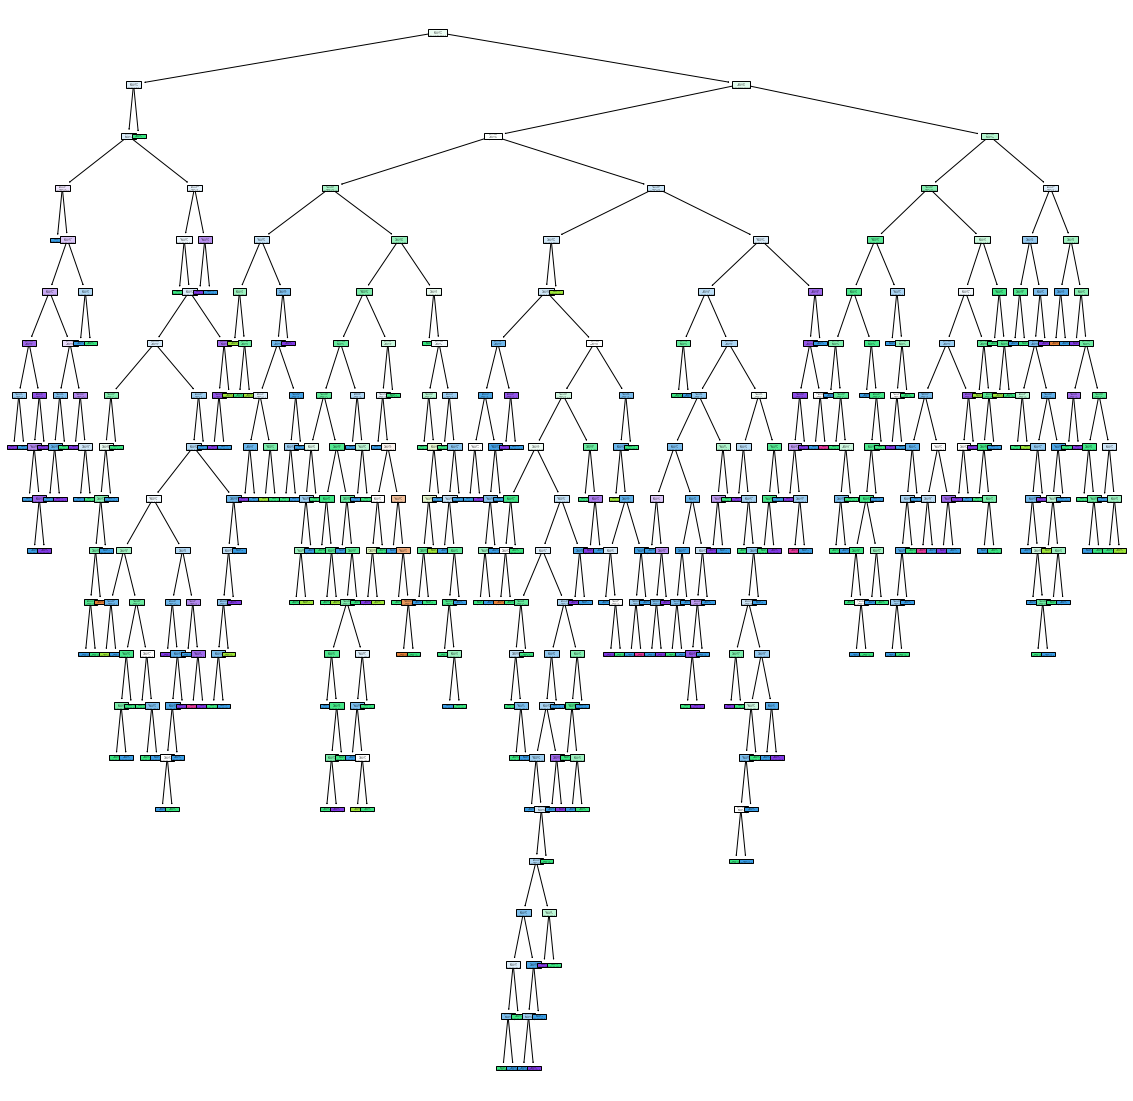

In [75]:
plt.figure(figsize=(20,20))
for i in range(len(rm_f.estimators_)):
    tree.plot_tree(rm_f.estimators_[i],filled=True)
   
    

In [76]:
gridparameter={
    'n_estimators':[5,10,50,100,120,150],
    "criterion":["gini","entropy"],
    "max_depth":range(10),
    "min_samples_leaf":range(10)
}

In [77]:
grid_search=GridSearchCV(param_grid=gridparameter, cv=10 , n_jobs=-1,verbose=1,estimator=rm_f)

In [79]:
#grid_search.fit(x_train,y_train)